# **로지스틱 회귀**
* 회귀지만 가능한 클래스가 2개인 이진 분류 모델

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
samples = 1000
X, y = make_classification(n_samples=samples, n_features= 2, n_informative= 2 , n_redundant=0,
                           n_clusters_per_class = 1)

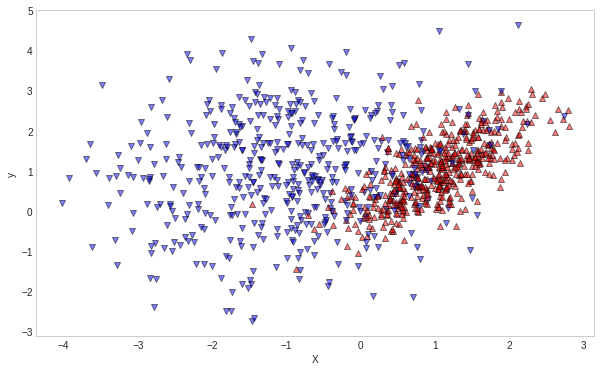

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10, 6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(X[i, 0], X[i, 1], edgecolors = 'k', alpha = 0.5, marker = '^', color = 'r')
  else:
        ax.scatter(X[i, 0], X[i, 1], edgecolors = 'k', alpha = 0.5, marker = 'v', color = 'b')

plt.show()

In [ ]:
X_train, X_val ,y_train, y_val = train_test_split(X, y, test_size= 0.2)
model = LogisticRegression()

model.fit(X_train, y_train)
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))

print('테스트 데이터 점수 : {}'.format(model.score(X_val, y_val)))

학습 데이터 점수 : 0.89625
테스트 데이터 점수 : 0.85


In [ ]:
scores  = cross_val_score(model, X, y, scoring = 'accuracy', cv = 10)
print('CV 평균 점수 : {}'.format(scores.mean()))

CV 평균 점수 : 0.885


In [ ]:
model.intercept_, model.coef_

(array([-0.0783259]), array([[-2.69412813,  0.84882009]]))

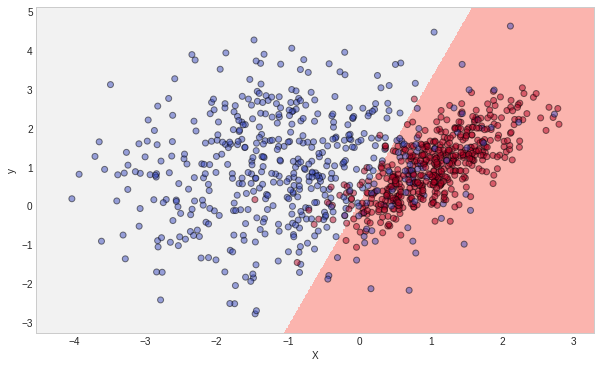

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize = (10, 6))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c = np.abs(y -1), edgecolors= 'k', alpha = 0.5, cmap = plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

## 붓꽃 데이터

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
species = pd.Series(iris.target, dtype = 'category')

species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


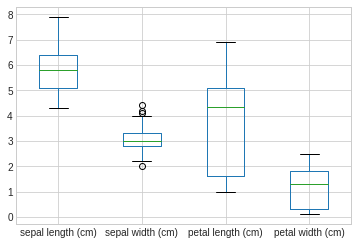

In [ ]:
iris_df.boxplot()

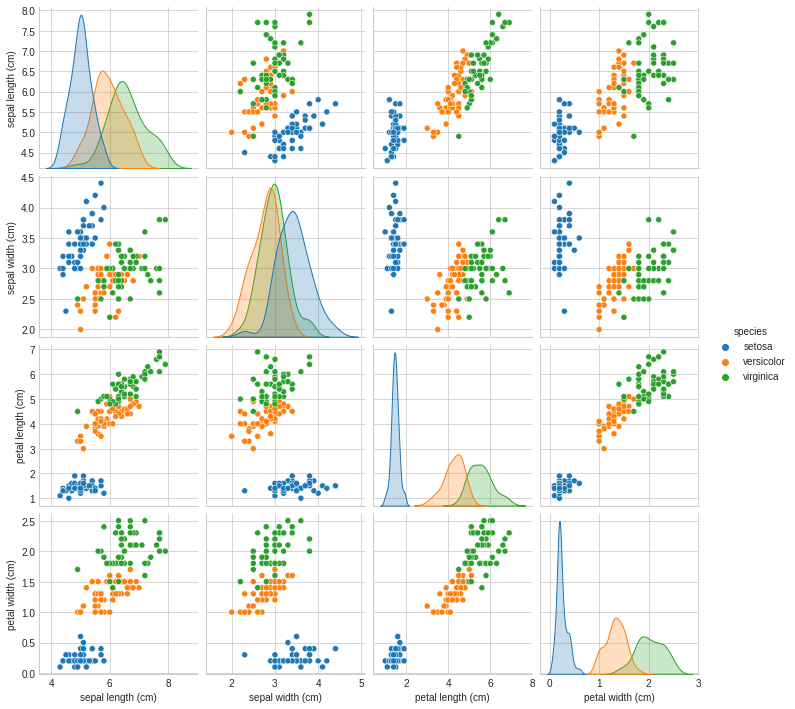

In [ ]:
import seaborn as sns 
sns.pairplot(iris_df, hue ='species')

## 붓꽃 데이터에 대한 로지스틱 회귀

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(iris.data[:, [2,3]], iris.target , random_state = 42, stratify= iris.target)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', C = 100.0, random_state= 42)
model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=42)

In [ ]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('테스트 데이터 점수 : {}'.format(model.score(X_val, y_val)))

학습 데이터 점수 : 0.9732142857142857
테스트 데이터 점수 : 0.9473684210526315


In [ ]:
import numpy as np 
X = np.vstack((X_train, X_val))
y = np.hstack((y_train, y_val))

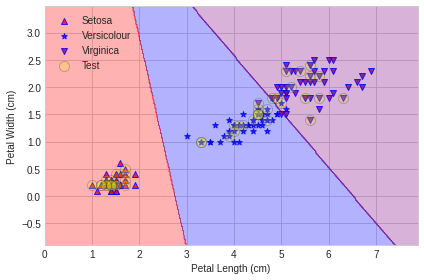

In [71]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

species = ('Setosa','Versicolour','Virginica')
markers = ('^','*','v')
colors = ('red', 'blue', 'purple')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1,xx2,Z, alpha = 0.3, cmap= cmap)

for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x = X[y == cl, 0], y=X[y == cl, 1],
              alpha = 0.8, c = colors[idx],
              marker = markers[idx], label = species[cl],
              edgecolor = 'b')
X_comb_test, y_comb_test = X[range(105,150), :], y[range(105,150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:,1],
            c = 'yellow', edgecolor = 'k', alpha = 0.2,
            linewidth = 1, marker = 'o',s = 100, label = 'Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout()